# Import data

In [34]:
import pandas as pd

# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('results-12-19.xlsx', sheet_name=None)
# dfs = pd.read_excel('results-12-22.xlsx', sheet_name=None)
# dfs = pd.read_excel('results-12-23.xlsx', sheet_name=None)
dfs = pd.read_excel('results-12-29-decision-sample.xlsx', sheet_name=None)

# Print the names of the sheets
print(dfs.keys())

dict_keys(['support increase', 'support decrease', 'confidence increase', 'confidence decrease', 'supp inc | conf inc', 'supp inc | conf dec', 'supp dec | conf inc', 'supp dec | conf dec', '(old change) supp inc|conf inc', '(old change) supp dec|conf dec', 'vary beta', 'vary |D| size', 'vary K'])


## Add IApriori

In [35]:
dfs_iapriori = pd.read_excel('results-fp-growth-1-5.xlsx', sheet_name=None)
dfs_iapriori.keys()

dict_keys(['support increase', 'support decrease', 'confidence increase', 'confidence decrease', 'supp inc | conf inc', 'supp inc | conf dec', 'supp dec | conf inc', 'supp dec | conf dec', '(old change) supp inc|conf inc', '(old change) supp dec|conf dec', 'vary |D| size', 'vary large |D| size', 'vary n'])

In [36]:
for key, df_iapriori in dfs_iapriori.items():
    if key in dfs:
        # Get the corresponding DataFrame in dfs
        df_main = dfs[key]

        # 1. Update the 'Baseline' column in df_iapriori to 'iapriori'
        df_iapriori['Baseline'] = 'IApriori'
        
        # 2. Rename column 'gen rule time(s)' in df_iapriori to 'Mining time'
        df_iapriori.rename(columns={'gen rule time(s)': 'Mining time'}, inplace=True)
        df_iapriori.rename(columns={'worker instances': 'worker instances数量'}, inplace=True)
        df_iapriori['Mining time'] = df_iapriori['Mining time'] * 1000  # Convert to ms


        # 3. Fill 'old support' and 'old confidence' in df_iapriori
        #    with the values from dfs[key] where 'Baseline' == 'batch'
        batch_rows = df_main[df_main['Baseline'] == 'batch']
        df_iapriori['old support'] = batch_rows['old support'].values
        df_iapriori['old confidence'] = batch_rows['old confidence'].values

        # Concatenate the updated df_iapriori with the main DataFrame
        dfs[key] = pd.concat([df_main, df_iapriori], ignore_index=True)

## Add DCFinder

In [37]:
# dfs_dc = pd.read_excel('results-DCFinder-0109.xlsx', sheet_name=None)
# dfs_dc = pd.read_excel('results-DCFinder-0114.xlsx', sheet_name=None)
# dfs_dc = pd.read_excel('results-DCFinder-0118.xlsx', sheet_name=None)
dfs_dc = pd.read_excel('results-DCFinder-0119.xlsx', sheet_name=None)
dfs_dc.keys()

dict_keys(['supp inc | conf dec', 'supp dec | conf dec', '(old change) supp dec|conf dec', 'support increase', 'support decrease', 'confidence increase', 'confidence decrease', 'supp inc | conf inc', 'supp dec | conf inc', '(old change) supp inc|conf inc'])

In [38]:
for key, df_dc in dfs_dc.items():
    if key in dfs:
        # Get the corresponding DataFrame in dfs
        df_main = dfs[key]

        # 1. Update the 'Baseline' column in df_iapriori to 'iapriori'
        df_dc['Baseline'] = 'DCFinder'
        
        # 2. Rename column 'Mining time(s)' to 'Mining time'
        df_dc.rename(columns={'Mining time(s)': 'Mining time'}, inplace=True)
        
        # Scale values by 1000 if they are numeric, leave as is if 'timeout'
        df_dc['Mining time'] = df_dc['Mining time'].apply(
            lambda x: x * 1000 if isinstance(x, (int, float)) else x
        )

        # 3. Fill 'old support' and 'old confidence' in df_iapriori
        #    with the values from dfs[key] where 'Baseline' == 'batch'
        batch_rows = df_main[df_main['Baseline'] == 'batch']
        df_dc['old support'] = batch_rows['old support'].values
        df_dc['old confidence'] = batch_rows['old confidence'].values

        # Concatenate the updated df_iapriori with the main DataFrame
        dfs[key] = pd.concat([df_main, df_dc], ignore_index=True)

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Set default figure size (width, height in inches)
plt.rcParams['figure.figsize'] = [4, 3]

plt.rcParams['font.size'] = 16

plt.rcParams['lines.markersize'] = 10  # Default marker size is 6

In [40]:
VERBOSE = False

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colorMap = {
    "batch": colors[1],
    "IncMiner1.0": colors[0],
    "IncMiner": colors[0],
    "IncMiner0.7": colors[2],
    "IncMinerNS": colors[4],
    "IApriori": colors[3],
    "DCFinder": colors[5]
}

markerMap = {
    "batch": '^',
    "IncMiner1.0": 's',
    "IncMiner": 's',
    "IncMiner0.7": 'v',
    "IncMinerNS": '*',
    "IApriori": '+',
    "DCFinder": 'x'
    
}

markerStyleMap = {
    "batch": {'markerfacecolor': 'none', 'markeredgewidth': 1.0},
    "IncMiner1.0": {'markerfacecolor': 'none', 'markeredgewidth': 1.5},
    "IncMiner": {'markerfacecolor': 'none', 'markeredgewidth': 1.5},
    "IncMiner0.7": {'markerfacecolor': 'none', 'markeredgewidth': 1.5},
    "IncMinerNS": {'markerfacecolor': 'none', 'markeredgewidth': 1.0, 'markersize':20},
    "IApriori": {'markerfacecolor': 'auto', 'markeredgewidth': 1.5},
    "DCFinder": {'markerfacecolor': 'auto', 'markeredgewidth': 1.0},
}


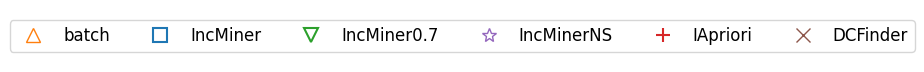

In [41]:
# Create legend elements, skipping "IncMiner1.0"
legend_elements = [
    plt.Line2D([0], [0], color=colorMap[label], marker=markerMap[label], 
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
               linestyle='', label=label)
    for label in colorMap.keys() if label != "IncMiner1.0"
]

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust width and height for a wide flat layout

# Remove axes
ax.axis('off')

# Add the legend
ax.legend(
    handles=legend_elements,
    loc='center',
    frameon=True,
    fontsize=12,
    ncol=len(legend_elements),  # Arrange all legend entries in a single row
)

# Adjust layout
plt.tight_layout()

# Save or display the legend-only plot
plt.savefig("plots/legend.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [9]:
ylabel_time = "Running time (s)"

In [10]:
def post_process(_df):
    # 1. Compute scale factor of 'new support' over 'old support'
    _df['supportScale'] = _df['new support'] / _df['old support']

    # 2. Compute absolute difference of 'new confidence' over 'old confidence'
    _df['confDiff'] = _df['new confidence'] - _df['old confidence']
    
    # 3. Assign new label name
    _df['label'] = _df['Baseline'] + _df['beta'].fillna('').astype(str)
    
    # 4. Convert Mining time scale, but leave as is if 'timeout'
    _df['time'] = _df['Mining time'].apply(
        lambda x: max(x,1000) / 1000 if isinstance(x, (int, float)) else x
    )

    return _df

In [11]:
def compute_speedup(df, baseline_label, target_labels, metric="time"):
    """
    Compute the maximal and average speedup for target labels compared to a baseline label,
    replacing zero values with 1 to avoid division errors.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing timing data.
        baseline_label (str): The label of the baseline group (e.g., 'batch').
        target_labels (list): A list of labels for the groups to compare against the baseline.
    
    Returns:
        dict: A dictionary with the speedup results for each target label.
    """
    # Group by the "label" column
    groups = df.groupby('label')
    
    # Extract baseline times
    if baseline_label not in groups.groups:
        raise ValueError(f"Baseline label '{baseline_label}' not found in data.")
    
    # times_baseline = groups.get_group(baseline_label)['time'].replace(0, 1).values  # Replace 0 with 1
    times_baseline = groups.get_group(baseline_label)[metric].apply(lambda x: max(x, 1)).values  # Replace values < 1 with 1

    
    # Initialize results dictionary
    speedup_results = {}
    
    # Compute speedup for each target label
    for label in target_labels:
        if label not in groups.groups:
            print(f"Warning: Target label '{label}' not found in data. Skipping.")
            continue
        
        # times_target = groups.get_group(label)['time'].replace(0, 1).values  # Replace 0 with 1
        times_target = groups.get_group(label)[metric].apply(lambda x: max(x, 1)).values  # Replace values < 1 with 1

        
        # Ensure the baseline and target have the same number of entries
        if len(times_baseline) != len(times_target):
            raise ValueError(f"Mismatch in number of entries for baseline '{baseline_label}' and target '{label}'.")
        
        # Calculate speedup
        speedups = times_baseline / times_target
        
        # Store results
        speedup_results[label] = {
            "max_speedup": speedups.max(),
            "avg_speedup": speedups.mean()
        }
    
    return speedup_results

# Exp-3 : vary K

In [12]:
tab = 'vary K'
df = dfs[tab]
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,use neighbor confs,output size,auxiliary size,minimal size,decision tree REE number,decision tree size,supportScale,confDiff,label,time
0,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,1,0.7,20,143727,...,NaN,24.901459,23.870969,1.030467,0,0.000023,1.0,-0.3,IncMiner0.7,143.727
1,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,2,0.7,20,146360,...,NaN,24.481539,23.331662,1.149854,0,0.000023,1.0,-0.3,IncMiner0.7,146.360
2,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.7,20,150679,...,NaN,24.033647,22.805283,1.228341,0,0.000023,1.0,-0.3,IncMiner0.7,150.679
3,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,4,0.7,20,153995,...,NaN,23.823119,22.489033,1.334064,0,0.000023,1.0,-0.3,IncMiner0.7,153.995
4,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,5,0.7,20,165975,...,NaN,23.589503,22.265990,1.323490,0,0.000023,1.0,-0.3,IncMiner0.7,165.975


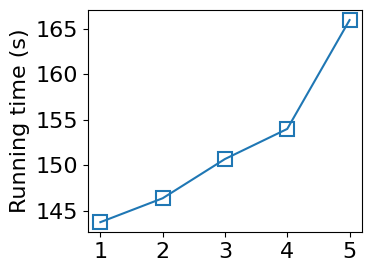

In [13]:
select = df['Baseline'] == 'IncMiner'
X = df[select]["K"]
Y = df[select]["time"] 

plt.figure()
label = "IncMiner"
plt.plot(X, Y, marker='s',
                        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),)  
plt.ylabel('Running time (s)')  # Label for the y-axis

xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('K')  # Label for the x-axis
    plt.title('K vs Mining Time')  # Title of the plot
    
outfile = "plots/exp3_hospital_k_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    

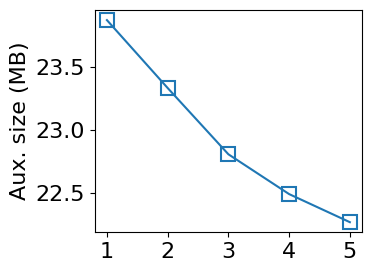

In [14]:
X = df[select]["K"]
Y = df[select]["auxiliary size"] 
# Y = df[select]["sample number"] 

# Plot the data
plt.figure()
plt.plot(X, Y, marker='s',                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 
plt.ylabel('Aux. size (MB)')  # Label for the y-axis


xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.title(tab)
    plt.xlabel('K')  # Label for the x-axis

outfile = "plots/exp3_hospital_k_storage.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight') 

# Show the plot
plt.show()

**Comments**:

Why at K=1, aux.size is the same as K=3. 
We also expect a positive correlation between K and auxiliary data size.

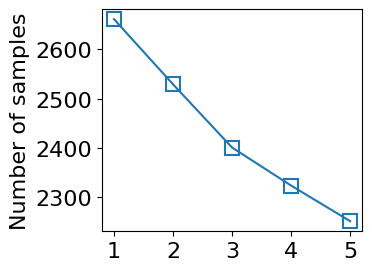

In [15]:
X = df[select]["K"]
Y = df[select]["sample number"] 

# Plot the data
plt.figure()
plt.plot(X, Y, marker="s",                 markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),)  # You can change the color and line style
plt.ylabel('Number of samples')  # Label for the y-axis

xtick_labels = [str(x) for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.title(tab)
    plt.xlabel('K')  # Label for the x-axis

outfile = "plots/exp3_hospital_k_samples.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight') 

# Show the plot
plt.show()

## Vary beta

In [16]:
df = dfs["vary beta"]
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,use neighbor confs,output size,auxiliary size,minimal size,decision tree REE number,decision tree size,supportScale,confDiff,label,time
0,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.6,20,130973,...,NaN,23.928524,22.805283,1.123219,0,0.000023,1.0,-0.3,IncMiner0.6,130.973
1,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.7,20,153884,...,NaN,23.745255,22.805283,0.939950,0,0.000023,1.0,-0.3,IncMiner0.7,153.884
2,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.8,20,168663,...,NaN,23.948734,22.805283,1.143429,0,0.000023,1.0,-0.3,IncMiner0.8,168.663
3,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,0.9,20,191316,...,NaN,23.667345,22.805283,0.862040,0,0.000023,1.0,-0.3,IncMiner0.9,191.316
4,inc_rds.hospital,0.000001,0.9,0.000001,0.6,IncMiner,3,1.0,20,278490,...,NaN,23.464969,22.805283,0.659663,0,0.000023,1.0,-0.3,IncMiner1.0,278.490


0     85
1     89
2     91
3     96
4    100
Name: recall rate, dtype: int64


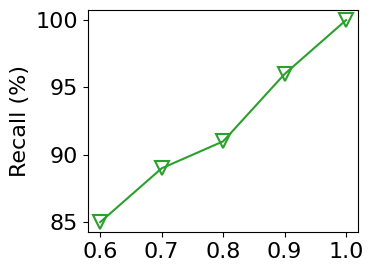

In [17]:

# Assuming 'Sample number' is a column in df and 'Mining time' is another column
X = df["beta"]
Y = (df["recall rate"] * 100).round().astype(int)
print(Y)

# Plot the data
label = "IncMiner0.7"
plt.plot(X, Y, marker=markerMap[label], color=colorMap[label],                
         markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 
plt.ylabel('Recall (%)')  # Label for the y-axis

xtick_labels = [f"{x:.1f}" for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('beta')  # Label for the x-axis
    
outfile = "plots/exp3_hospital_beta_recall.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')     

# Show the plot
plt.show()

In [18]:
np.mean((df["recall rate"]-X)[0:4])

np.float64(0.15026595744680823)

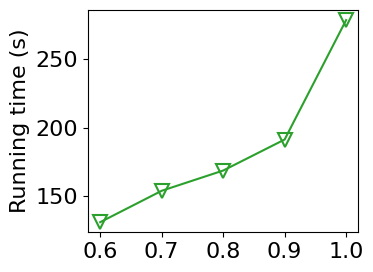

In [19]:
X = df["beta"]
Y = df["time"]

# Plot the data
label = "IncMiner0.7"
plt.plot(X, Y, marker=markerMap[label], color=colorMap[label],
                        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 
plt.ylabel('Running time (s)')  # Label for the y-axis

xtick_labels = [f"{x:.1f}" for x in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('beta')  # Label for the x-axis
    
outfile = "plots/exp3_hospital_beta_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')  

# Show the plot
plt.show()

## Comments

Now the mining time is too fast. May use a larger dataset.

# Exp-2

## Vary |D|

In [20]:
tab = 'vary |D| size'

df = dfs[tab]
# df = pd.read_excel('results-vary-d-large-1-5.xlsx')
df = post_process(df)
df['time-per-rule'] = df["time"] / df['decision tree REE number']
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,|D| size,Mining time,...,decision tree REE number,decision tree size,total size,not decision tree ree,frequest itemSets time(s),supportScale,confDiff,label,time,time-per-rule
0,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.2,88865.000000,...,4357.0,17.855036,68.824582,395.0,NaN,0.1,-0.1,IncMiner0.7,88.865,0.020396
1,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.4,153066.000000,...,5943.0,24.667562,113.636271,426.0,NaN,0.1,-0.1,IncMiner0.7,153.066,0.025756
2,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.6,203954.000000,...,6798.0,28.762400,154.105046,453.0,NaN,0.1,-0.1,IncMiner0.7,203.954,0.030002
3,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,0.8,222347.000000,...,6715.0,28.881948,189.585740,467.0,NaN,0.1,-0.1,IncMiner0.7,222.347,0.033112
4,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,1.0,236622.000000,...,6226.0,26.951264,222.412769,542.0,NaN,0.1,-0.1,IncMiner0.7,236.622,0.038005
5,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.2,175882.000000,...,11683.0,47.742509,98.536230,351.0,NaN,0.1,-0.1,IncMiner1.0,175.882,0.015055
6,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.4,280402.000000,...,14632.0,60.393650,149.301526,433.0,NaN,0.1,-0.1,IncMiner1.0,280.402,0.019164
7,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.6,381101.000000,...,16166.0,68.219078,193.378830,422.0,NaN,0.1,-0.1,IncMiner1.0,381.101,0.023574
8,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,0.8,467858.000000,...,18321.0,77.747424,238.251814,429.0,NaN,0.1,-0.1,IncMiner1.0,467.858,0.025537
9,dblp,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,1.0,533144.000000,...,18032.0,77.409133,272.671961,488.0,NaN,0.1,-0.1,IncMiner1.0,533.144,0.029567


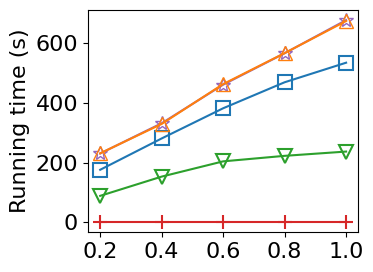

{'IncMiner1.0': {'max_speedup': np.float64(1.311771528638519),
  'avg_speedup': np.float64(1.23297196521557)},
 'IncMiner0.7': {'max_speedup': np.float64(2.840838975243215),
  'avg_speedup': np.float64(2.4782166582241616)}}

In [21]:
# Group by the "label" column
groups = df.groupby('label')

plt.figure()
for label, group in groups:
    plt.plot(group['|D| size'], group['time'], label=label, color=colorMap[label], marker=markerMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
if VERBOSE:
    plt.legend()
    plt.xlabel('|D|')  # Label for the x-axis
plt.ylabel(ylabel_time)

xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')  

# Show the plot
plt.show()

compute_speedup(df, "batch", ["IncMiner1.0", "IncMiner0.7"])

# compute_speedup(df, "IncMiner1.0", ["IncMiner0.7"])

IApriori
IncMiner0.7
IncMiner1.0
IncMinerNS
batch


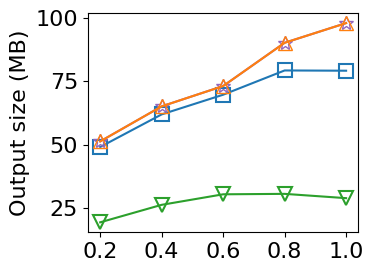

In [22]:
plt.figure()
for label, group in groups:
    print (label)
    # print (group['output size'])
    plt.plot(group['|D| size'], group['output size'], label=label, color=colorMap[label], marker=markerMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
plt.ylabel('Output size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_output.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      
    
# Show the plot
plt.show()

Questions:
    1. Why IncMiner has smaller output size than batchMiner?
    2. Why IncMienr0.7 has less than 50% output size of BatchMiner? By design it should has at least 70%.

IApriori
IncMiner0.7
IncMiner1.0
IncMinerNS


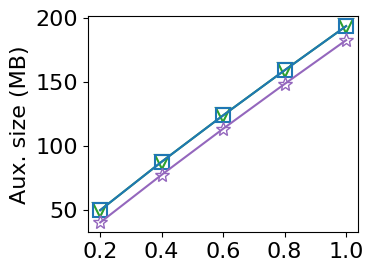

{'IncMinerNS': {'max_speedup': np.float64(1.2410874119474946),
  'avg_speedup': np.float64(1.1197075378596328)}}

In [23]:
plt.figure()
for label, group in groups:
    if label == 'batch':
        continue
        
    print (label)
    # print (group['auxiliary size'])
    plt.plot(group['|D| size'], group['auxiliary size'], label=label, color=colorMap[label], 
             marker=markerMap[label],
             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
plt.ylabel('Aux. size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_dblp_d_aux.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      

# Show the plot
plt.show()

compute_speedup(df, "IncMiner1.0", ["IncMinerNS"], metric='auxiliary size')

**Comments**: 

IncMinerNS is expcted to have less auxiliary data 
as it stores no samples.

## Large dataset

In [50]:
# df = pd.read_excel('results-vary-d-large-1-5.xlsx')
# df = pd.read_excel('results-1-9-vary-d-large-fix-support.xlsx')
# df = pd.read_excel('results-1-11-vary-d-large-fix-support(1).xlsx')
df = pd.read_excel('results-vary-d-large-0123.xlsx')

df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,|D| size,Mining time,...,auxiliary size,taskId,not decision tree minimal size,not decision tree REE number,decision tree REE number,decision tree size,supportScale,confDiff,label,time
0,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,0.7,0.2,20233,...,232.017826,1003552,0.071618,9,348,1.073675,0.7943,0.1,IncMiner0.7,20.233
1,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,0.7,0.4,265518,...,456.450388,1003553,0.118731,18,2261,8.093541,0.7943,0.1,IncMiner0.7,265.518
2,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,0.7,0.6,306113,...,658.775247,1003554,0.122750,23,4075,15.030877,0.7943,0.1,IncMiner0.7,306.113
3,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,0.7,0.8,717374,...,869.806200,1003555,0.155424,26,8963,33.901466,0.7943,0.1,IncMiner0.7,717.374
4,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,0.7,1.0,1411649,...,1071.162516,1003556,0.220248,39,10379,39.754237,0.7943,0.1,IncMiner0.7,1411.649
5,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,1.0,0.2,20085,...,232.017826,1003545,0.071618,9,348,1.073675,0.7943,0.1,IncMiner1.0,20.085
6,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,1.0,0.4,257529,...,456.450388,1003537,0.118731,18,2253,8.029881,0.7943,0.1,IncMiner1.0,257.529
7,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,1.0,0.6,314542,...,658.775247,1003539,0.122750,23,4070,14.975174,0.7943,0.1,IncMiner1.0,314.542
8,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,1.0,0.8,713542,...,869.806200,1003541,0.155424,26,8969,34.833149,0.7943,0.1,IncMiner1.0,713.542
9,park_song,0.000001,0.6,7.943000e-07,0.7,IncMiner,3,1.0,1.0,1367329,...,1071.162516,1003543,0.220248,39,10382,40.014339,0.7943,0.1,IncMiner1.0,1367.329


IncMiner0.7
0      20.233
1     265.518
2     306.113
3     717.374
4    1411.649
Name: time, dtype: float64
IncMiner1.0
5      20.085
6     257.529
7     314.542
8     713.542
9    1367.329
Name: time, dtype: float64
IncMinerNS
10      20.378
11     268.218
12     309.891
13     723.989
14    1413.047
Name: time, dtype: float64
batch
15      84.586
16     660.805
17     813.265
18    2592.704
19    4535.284
Name: time, dtype: float64


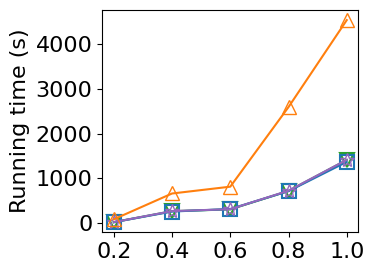

{'IncMiner1.0': {'max_speedup': np.float64(4.211401543440378),
  'avg_speedup': np.float64(3.262672083173598)},
 'IncMiner0.7': {'max_speedup': np.float64(4.180596055948203),
  'avg_speedup': np.float64(3.2305996573151234)}}

In [51]:
# Group by the "label" column
groups = df.groupby('label')

plt.figure()
for label, group in groups:
    print(label)
    print(group['time'])
    plt.plot(group['|D| size'], group['time'], label=label, color=colorMap[label], marker=markerMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
if VERBOSE:
    plt.legend()
    plt.xlabel('|D|')  # Label for the x-axis
plt.ylabel(ylabel_time)

xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_parksong_d_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')  

# Show the plot
plt.show()

compute_speedup(df, "batch", ["IncMiner1.0", "IncMiner0.7"])

# compute_speedup(df, "IncMiner1.0", ["IncMiner0.7"])

IncMiner0.7
IncMiner1.0
IncMinerNS
batch


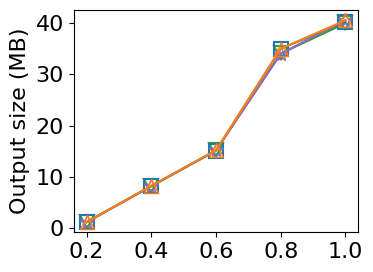

In [52]:
plt.figure()
for label, group in groups:
    print (label)
    plt.plot(group['|D| size'], group['output size'], label=label, color=colorMap[label], marker=markerMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
plt.ylabel('Output size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_parksong_d_output.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      
    
# Show the plot
plt.show()

IncMiner0.7
0     1.145293
1     8.212272
2    15.153627
3    34.056890
4    39.974485
Name: output size, dtype: float64
IncMiner1.0
5     1.145293
6     8.148611
7    15.097924
8    34.993086
9    40.234587
Name: output size, dtype: float64
IncMinerNS
10     1.137335
11     8.164526
12    15.137712
13    34.006888
14    40.572717
Name: output size, dtype: float64
batch
15     1.161208
16     8.221437
17    15.177464
18    34.996698
19    40.529784
Name: output size, dtype: float64


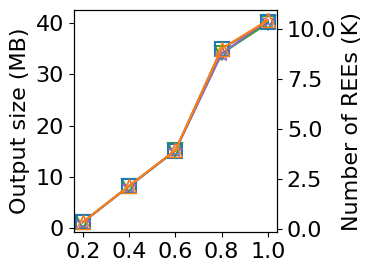

In [53]:
# Create the figure and the main axis
fig, ax_left = plt.subplots()

# Plot the primary y-axis data
for label, group in groups:
    print(label)
    print(group['output size'])
    ax_left.plot(
        group['|D| size'], group['output size'], label=label,
        color=colorMap[label], marker=markerMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
    )

# Configure the left y-axis
ax_left.set_ylabel('Output size (MB)')
ax_left.tick_params(axis='y')

# Add a secondary y-axis for "REE number"
ax_right = ax_left.twinx()  # Create a twin y-axis sharing the same x-axis

# Plot the secondary y-axis data
for label, group in groups:
    ax_right.plot(
        group['|D| size'], group['minimal REE number']/1000, alpha=0)

# Configure the right y-axis
ax_right.set_ylabel('Number of REEs (K)')
ax_right.tick_params(axis='y')

# Set x-ticks
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
ax_left.set_xticks(group['|D| size'])
ax_left.set_xticklabels(xtick_labels)

# Add title and layout adjustments
if VERBOSE:
    ax_left.set_title(tab)

plt.tight_layout()
outfile = "plots/exp2_parksong_d_output.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Show the plot
plt.show()

In [54]:
groups = df.groupby('label')

plt.figure()
for label, group in groups:
    plt.plot(group['|D| size'], group['time-per-rule'], label=label, color=colorMap[label], marker=markerMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
plt.ylabel('Time per rule (s)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_d_time-per-rule.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      
    
# Show the plot
plt.show()

KeyError: 'time-per-rule'

<Figure size 400x300 with 0 Axes>

IncMiner0.7
232.017826080322 1071.16251564026
IncMiner1.0
232.017826080322 1071.16251564026
IncMinerNS
231.466330528259 1064.49979782104


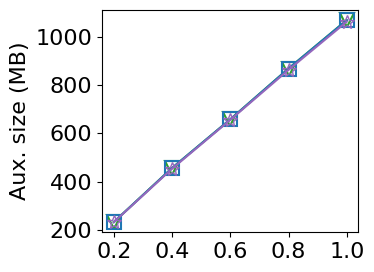

{'IncMinerNS': {'max_speedup': np.float64(1.0064760033146256),
  'avg_speedup': np.float64(1.0049594202821095)}}

In [55]:
plt.figure()
for label, group in groups:
    if label == 'batch':
        continue
        
    print (label)
    Y = group['auxiliary size']
    print (Y.min(), Y.max())
    plt.plot(group['|D| size'], group['auxiliary size'], label=label, color=colorMap[label], 
             marker=markerMap[label],
             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            ) 

# Plot the data
plt.ylabel('Aux. size (MB)')  # Label for the y-axis
if VERBOSE:
    plt.xlabel('|D|')  # Label for the x-axis
    plt.title(tab)
    plt.legend()
    
xtick_labels = [f"{d:.1f}" for d in group['|D| size']]
plt.xticks(group['|D| size'], xtick_labels)

outfile = "plots/exp2_parksong_d_aux.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')      

# Show the plot
plt.show()

compute_speedup(df, "IncMiner1.0", ["IncMinerNS"], metric='auxiliary size')

## Vary n

In [30]:
# dfs_varyn = pd.read_excel('results-vary-n.xlsx', sheet_name=None)
# dfs_varyn = pd.read_excel('results-01-11-vary-n(1).xlsx', sheet_name=None)
dfs_varyn = pd.read_excel('results_vary_n_0115.xlsx', sheet_name=None)

# Print the names of the sheets
print(dfs_varyn.keys())

dict_keys(['vary n'])


In [31]:
key = 'vary n'
df = dfs_varyn[key]
df_iapriori = dfs_iapriori['vary n'].copy(deep=True)   


# 1. Update the 'Baseline' column in df_iapriori to 'iapriori'
df_iapriori['Baseline'] = 'IApriori'

# 2. Rename column 'gen rule time(s)' in df_iapriori to 'Mining time'
df_iapriori.rename(columns={'gen rule time(s)': 'Mining time'}, inplace=True)
df_iapriori['Mining time'] = df_iapriori['Mining time'] * 1000
# df_iapriori.rename(columns={'worker instances': 'worker instances 数量'}, inplace=True)


# 3. Fill 'old support' and 'old confidence' in df_iapriori
#    with the values from dfs[key] where 'Baseline' == 'batch'
batch_rows = df[df['Baseline'] == 'batch']
df_iapriori['old support'] = batch_rows['old support'].values
df_iapriori['old confidence'] = batch_rows['old confidence'].values

# Concatenate the updated df_iapriori with the main DataFrame
df = pd.concat([df, df_iapriori], ignore_index=True)

In [32]:
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,taskId,use neighbor confs,output size,auxiliary size,minimal size,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,4,8.976090e+05,...,1003454.0,NaN,49.503244,48.754889,0.748332,NaN,0.1,-0.1,IncMiner0.7,897.609
1,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,8,4.459940e+05,...,1003459.0,NaN,49.492907,48.754493,0.738391,NaN,0.1,-0.1,IncMiner0.7,445.994
2,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,12,3.034490e+05,...,1003464.0,NaN,49.502848,48.754493,0.748332,NaN,0.1,-0.1,IncMiner0.7,303.449
3,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,16,2.453340e+05,...,1003472.0,NaN,49.503651,48.755296,0.748332,NaN,0.1,-0.1,IncMiner0.7,245.334
4,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,0.7,20,1.974340e+05,...,1003477.0,NaN,49.502848,48.754493,0.748332,NaN,0.1,-0.1,IncMiner0.7,197.434
5,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,4,9.481500e+05,...,1003455.0,NaN,49.365491,48.754889,0.610579,NaN,0.1,-0.1,IncMiner1.0,948.150
6,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,8,4.983810e+05,...,1003460.0,NaN,49.365094,48.754493,0.610579,NaN,0.1,-0.1,IncMiner1.0,498.381
7,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,12,3.368450e+05,...,1003465.0,NaN,49.365094,48.754493,0.610579,NaN,0.1,-0.1,IncMiner1.0,336.845
8,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,16,2.717160e+05,...,1003473.0,NaN,49.365897,48.755296,0.610579,NaN,0.1,-0.1,IncMiner1.0,271.716
9,inc_rds.inspection,0.00001,0.8,0.000001,0.7,IncMiner,3,1.0,20,2.206070e+05,...,1003478.0,NaN,49.365094,48.754493,0.610579,NaN,0.1,-0.1,IncMiner1.0,220.607


IApriori 1.0
IncMiner0.7 4.546374991136279
IncMiner1.0 4.297914390749161
IncMinerNS 4.300790772340805
batch 4.271120029898569


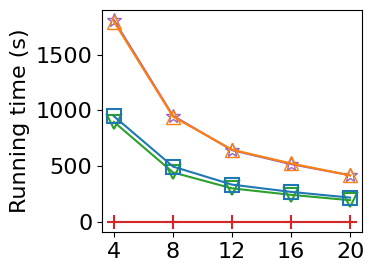

{'IncMiner1.0': {'max_speedup': np.float64(1.935531952479795),
  'avg_speedup': np.float64(1.911072442762611)},
 'IncMiner0.7': {'max_speedup': np.float64(2.1436694465504167),
  'avg_speedup': np.float64(2.1056721944725245)}}

In [33]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    # X = group["worker instances 数量"]
    X = group["worker instances"]
    Y = group['time']
    print(label, max(Y) / min(Y))
    plt.plot(range(len(X)), Y, label=label, marker=markerMap[label],color=colorMap[label],
                            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis
# plt.xscale("log")

xtick_labels = [v for v in X]
plt.xticks(range(len(X)), xtick_labels)


if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_vary_n.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# compute_speedup(df, "batch", ["IncMiner", "IncMiner0.7"])
compute_speedup(df, "batch", ["IncMiner1.0", "IncMiner0.7"])


# Exp-1

## support increase

In [100]:
tab = 'support increase'
df = dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),index,supportScale,confDiff,label,time
0,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMiner,3,0.7,20.0,0.000000e+00,...,0.914148,0.0,0.000023,NaN,NaN,NaN,10.0,0.0,IncMiner0.7,1.000000
1,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMiner,3,0.7,20.0,0.000000e+00,...,0.333122,0.0,0.000023,NaN,NaN,NaN,100.0,0.0,IncMiner0.7,1.000000
2,inc_rds.adult,0.000001,0.75,0.00100,0.75,IncMiner,3,0.7,20.0,0.000000e+00,...,0.313022,0.0,0.000023,NaN,NaN,NaN,1000.0,0.0,IncMiner0.7,1.000000
3,inc_rds.adult,0.000001,0.75,0.01000,0.75,IncMiner,3,0.7,20.0,0.000000e+00,...,0.251007,0.0,0.000023,NaN,NaN,NaN,10000.0,0.0,IncMiner0.7,1.000000
4,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMiner,3,NaN,20.0,0.000000e+00,...,0.914148,0.0,0.000023,NaN,NaN,NaN,10.0,0.0,IncMiner,1.000000
5,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMiner,3,NaN,20.0,0.000000e+00,...,0.333122,0.0,0.000023,NaN,NaN,NaN,100.0,0.0,IncMiner,1.000000
6,inc_rds.adult,0.000001,0.75,0.00100,0.75,IncMiner,3,NaN,20.0,0.000000e+00,...,0.313022,0.0,0.000023,NaN,NaN,NaN,1000.0,0.0,IncMiner,1.000000
7,inc_rds.adult,0.000001,0.75,0.01000,0.75,IncMiner,3,NaN,20.0,0.000000e+00,...,0.251007,0.0,0.000023,NaN,NaN,NaN,10000.0,0.0,IncMiner,1.000000
8,inc_rds.adult,0.000001,0.75,0.00001,0.75,IncMinerNS,3,NaN,20.0,0.000000e+00,...,0.914148,0.0,0.000023,NaN,NaN,NaN,10.0,0.0,IncMinerNS,1.000000
9,inc_rds.adult,0.000001,0.75,0.00010,0.75,IncMinerNS,3,NaN,20.0,0.000000e+00,...,0.333122,0.0,0.000023,NaN,NaN,NaN,100.0,0.0,IncMinerNS,1.000000


DCFinder
IApriori
IncMiner
IncMiner0.7
IncMinerNS
batch


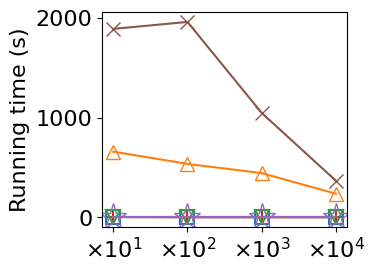

{'IncMiner': {'max_speedup': np.float64(658.082),
  'avg_speedup': np.float64(468.51325)},
 'IncMiner0.7': {'max_speedup': np.float64(658.082),
  'avg_speedup': np.float64(468.51325)}}

In [102]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['supportScale']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)) 

# plt.yscale("log")
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
plt.xticks(range(len(X)), xtick_labels)


if VERBOSE:
    plt.xlabel('supportScale')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_increase_supp.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

In [36]:
compute_speedup(df, 'DCFinder', ['IncMiner', 'IncMiner0.7'])

{'IncMiner': {'max_speedup': np.float64(1956.81557369232),
  'avg_speedup': np.float64(1314.0042799711186)},
 'IncMiner0.7': {'max_speedup': np.float64(1956.81557369232),
  'avg_speedup': np.float64(1314.0042799711186)}}

## support decrease

In [12]:
tab = 'support decrease'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),index,supportScale,confDiff,label,time
0,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMiner,3,0.7,20.0,2005.0,...,0.000023,0.0,0.000023,NaN,NaN,NaN,0.1000,0.0,IncMiner0.7,2.005
1,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMiner,3,0.7,20.0,18758.0,...,0.108508,0.0,0.000023,NaN,NaN,NaN,0.0100,0.0,IncMiner0.7,18.758
2,inc_rds.inspection,0.01,0.75,0.000010,0.75,IncMiner,3,0.7,20.0,167490.0,...,0.264170,0.0,0.000023,NaN,NaN,NaN,0.0010,0.0,IncMiner0.7,167.49
3,inc_rds.inspection,0.01,0.75,0.000001,0.75,IncMiner,3,0.7,20.0,335200.0,...,0.883930,0.0,0.000023,NaN,NaN,NaN,0.0001,0.0,IncMiner0.7,335.2
4,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMiner,3,NaN,20.0,1891.0,...,0.000023,0.0,0.000023,NaN,NaN,NaN,0.1000,0.0,IncMiner,1.891
5,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMiner,3,NaN,20.0,18833.0,...,0.108508,0.0,0.000023,NaN,NaN,NaN,0.0100,0.0,IncMiner,18.833
6,inc_rds.inspection,0.01,0.75,0.000010,0.75,IncMiner,3,NaN,20.0,168100.0,...,0.264170,0.0,0.000023,NaN,NaN,NaN,0.0010,0.0,IncMiner,168.1
7,inc_rds.inspection,0.01,0.75,0.000001,0.75,IncMiner,3,NaN,20.0,336663.0,...,0.883930,0.0,0.000023,NaN,NaN,NaN,0.0001,0.0,IncMiner,336.663
8,inc_rds.inspection,0.01,0.75,0.001000,0.75,IncMinerNS,3,NaN,20.0,2048.0,...,0.000023,0.0,0.000023,NaN,NaN,NaN,0.1000,0.0,IncMinerNS,2.048
9,inc_rds.inspection,0.01,0.75,0.000100,0.75,IncMinerNS,3,NaN,20.0,18863.0,...,0.108508,0.0,0.000023,NaN,NaN,NaN,0.0100,0.0,IncMinerNS,18.863


DCFinder
IApriori
IncMiner
IncMiner0.7
IncMinerNS
batch


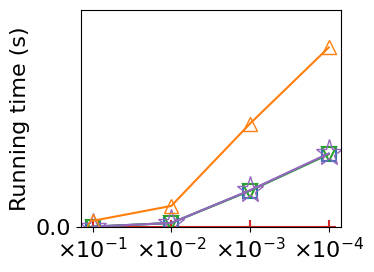

{'IncMiner': {'max_speedup': np.float64(15.167107350608145),
  'avg_speedup': np.float64(6.409235855055611)},
 'IncMiner0.7': {'max_speedup': np.float64(14.304738154613467),
  'avg_speedup': np.float64(6.204081508943939)}}

In [13]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()  # Adjust the figure size if needed

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

for label, group in groups:
    print(label)
    
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )

    X = group['supportScale']

    # Plot the data
    plt.plot(
        range(len(X)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis
# plt.xscale("log")

xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
plt.xticks(range(len(X)), xtick_labels)

# Add a custom y-axis tick for 'timeout'
yticks = plt.yticks()[0]  # Get the current y-axis ticks
plt.yticks(
    list(yticks) + [global_max_time*0.9],  # Add the timeout placeholder value to the ticks
    list(yticks) + ['TO']       # Add 'timeout' as the corresponding label
)
# plt.yscale('log')
# Preserve the current minimum y-axis limit, and set the maximum to timeout_value 
plt.ylim(0, 1000)

if VERBOSE:
    plt.xlabel('supportScale')  # Label for x-axis
    plt.title(tab)
    # plt.legend()
    
outfile = "plots/exp1_inspection_decrease_supp.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_38509/3787722571.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


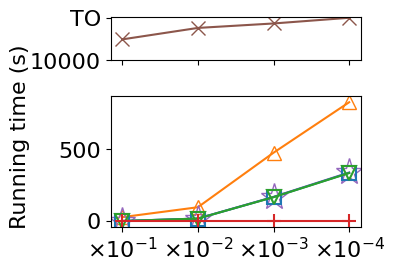

{'IncMiner': {'max_speedup': np.float64(15.167107350608145),
  'avg_speedup': np.float64(6.409235855055611)},
 'IncMiner0.7': {'max_speedup': np.float64(14.304738154613467),
  'avg_speedup': np.float64(6.204081508943939)}}

In [14]:
# Group by the "label" column
groups = df.groupby('label')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['DCFinder']
bottom_labels = ['batch', 'IncMinerNS','IncMiner', 'IncMiner0.7', 'IApriori']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


X = group['supportScale']
xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_decrease_supp.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Expect a consistent gap between batch and the rest.
At small \Delta \sigma, the gap is close to zero.

## confidence increase

In [41]:
tab = 'confidence increase'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,auxiliary size,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.7,0.000001,0.75,IncMiner,3,0.7,20.0,9.353000e+03,...,34.466459,0.849653,0.0,0.000023,NaN,NaN,1.0,0.05,IncMiner0.7,9.353
1,inc_rds.inspection,0.000001,0.7,0.000001,0.80,IncMiner,3,0.7,20.0,2.456800e+04,...,35.159388,0.991477,0.0,0.000023,NaN,NaN,1.0,0.10,IncMiner0.7,24.568
2,inc_rds.inspection,0.000001,0.7,0.000001,0.85,IncMiner,3,0.7,20.0,5.207300e+04,...,36.108680,1.048676,0.0,0.000023,NaN,NaN,1.0,0.15,IncMiner0.7,52.073
3,inc_rds.inspection,0.000001,0.7,0.000001,0.90,IncMiner,3,0.7,20.0,1.044000e+05,...,36.914202,1.190185,0.0,0.000023,NaN,NaN,1.0,0.20,IncMiner0.7,104.400
4,inc_rds.inspection,0.000001,0.7,0.000001,0.95,IncMiner,3,0.7,20.0,1.902220e+05,...,38.200987,1.238546,0.0,0.000023,NaN,NaN,1.0,0.25,IncMiner0.7,190.222
5,inc_rds.inspection,0.000001,0.7,0.000001,0.75,IncMiner,3,NaN,20.0,8.999000e+03,...,34.466459,0.849653,0.0,0.000023,NaN,NaN,1.0,0.05,IncMiner,8.999
6,inc_rds.inspection,0.000001,0.7,0.000001,0.80,IncMiner,3,NaN,20.0,2.460100e+04,...,35.159388,0.991477,0.0,0.000023,NaN,NaN,1.0,0.10,IncMiner,24.601
7,inc_rds.inspection,0.000001,0.7,0.000001,0.85,IncMiner,3,NaN,20.0,5.207700e+04,...,36.108680,1.048676,0.0,0.000023,NaN,NaN,1.0,0.15,IncMiner,52.077
8,inc_rds.inspection,0.000001,0.7,0.000001,0.90,IncMiner,3,NaN,20.0,1.035220e+05,...,36.914202,1.190185,0.0,0.000023,NaN,NaN,1.0,0.20,IncMiner,103.522
9,inc_rds.inspection,0.000001,0.7,0.000001,0.95,IncMiner,3,NaN,20.0,1.911030e+05,...,38.200987,1.238546,0.0,0.000023,NaN,NaN,1.0,0.25,IncMiner,191.103


<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_79286/3748121871.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta \delta$")  # Label for x-axis


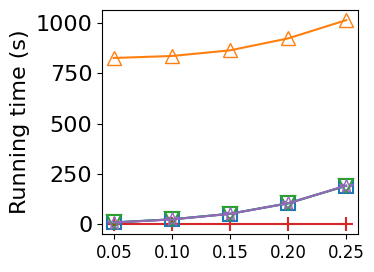

{'IncMiner': {'max_speedup': np.float64(91.69341037893099),
  'avg_speedup': np.float64(31.282392435721597)},
 'IncMiner0.7': {'max_speedup': np.float64(88.22292312626965),
  'avg_speedup': np.float64(30.58759311992673)}}

In [42]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    plt.plot(group['confDiff'], group['time'], label=label, marker=markerMap[label], color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),)

# Add plot labels and legend
plt.ylabel(ylabel_time)

if VERBOSE:
    plt.xlabel("$\Delta \delta$")  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
        
plt.tick_params(axis='x', labelsize=12)  

outfile = "plots/exp1_inspection_increase_conf.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

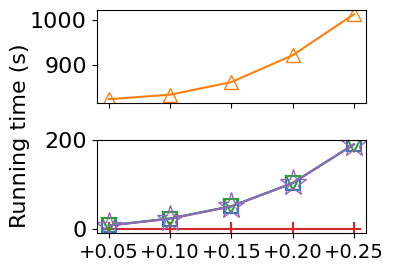

{'IncMiner': {'max_speedup': np.float64(91.69341037893099),
  'avg_speedup': np.float64(31.282392435721597)},
 'IncMiner0.7': {'max_speedup': np.float64(88.22292312626965),
  'avg_speedup': np.float64(30.58759311992673)}}

In [43]:
# Group by the "label" column
groups = df.groupby('label')

# Create a figure with two subplots (vertically stacked)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)

# Plot for "batch" in the top box
if 'batch' in groups.groups:
    batch_group = groups.get_group('batch')
    Y = batch_group['time']
    ax_top.plot(
        range(len(Y)), batch_group['time'], label='batch',
        marker=markerMap['batch'], color=colorMap['batch'],
        markerfacecolor=markerStyleMap['batch'].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap['batch'].get('markeredgewidth', 1.0),
    )

# Plot for other labels in the bottom box
for label, group in groups:
    if label != 'batch':  # Skip "batch" for the bottom plot
        Y = group['time']
        ax_bottom.plot(
            range(len(Y)), group['time'], label=label,
            marker=markerMap[label], color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )


X = group['confDiff']
xtick_labels = [f"+{v:.2f}" for v in X]
plt.xticks(range(len(X)), xtick_labels, fontsize=14)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_increase_conf.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## confidence decrease

In [44]:
tab = 'confidence decrease'
df =dfs[tab]
df = post_process(df)
df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,auxiliary size,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.95,0.000001,0.90,IncMiner,3,0.7,20.0,70536.000000,...,39.702646,1.294912,0.0,0.000023,NaN,NaN,1.0,-0.05,IncMiner0.7,70.536
1,inc_rds.inspection,0.000001,0.95,0.000001,0.85,IncMiner,3,0.7,20.0,92183.000000,...,39.702646,1.307466,0.0,0.000023,NaN,NaN,1.0,-0.10,IncMiner0.7,92.183
2,inc_rds.inspection,0.000001,0.95,0.000001,0.80,IncMiner,3,0.7,20.0,98205.000000,...,39.702646,1.289826,0.0,0.000023,NaN,NaN,1.0,-0.15,IncMiner0.7,98.205
3,inc_rds.inspection,0.000001,0.95,0.000001,0.75,IncMiner,3,0.7,20.0,103631.000000,...,39.702646,1.242677,0.0,0.000023,NaN,NaN,1.0,-0.20,IncMiner0.7,103.631
4,inc_rds.inspection,0.000001,0.95,0.000001,0.70,IncMiner,3,0.7,20.0,113008.000000,...,39.702646,1.238877,0.0,0.000023,NaN,NaN,1.0,-0.25,IncMiner0.7,113.008
5,inc_rds.inspection,0.000001,0.95,0.000001,0.90,IncMiner,3,NaN,20.0,183982.000000,...,39.702646,1.099248,0.0,0.000023,NaN,NaN,1.0,-0.05,IncMiner,183.982
6,inc_rds.inspection,0.000001,0.95,0.000001,0.85,IncMiner,3,NaN,20.0,185829.000000,...,39.702646,0.943348,0.0,0.000023,NaN,NaN,1.0,-0.10,IncMiner,185.829
7,inc_rds.inspection,0.000001,0.95,0.000001,0.80,IncMiner,3,NaN,20.0,182575.000000,...,39.702646,0.873350,0.0,0.000023,NaN,NaN,1.0,-0.15,IncMiner,182.575
8,inc_rds.inspection,0.000001,0.95,0.000001,0.75,IncMiner,3,NaN,20.0,190047.000000,...,39.702646,0.764860,0.0,0.000023,NaN,NaN,1.0,-0.20,IncMiner,190.047
9,inc_rds.inspection,0.000001,0.95,0.000001,0.70,IncMiner,3,NaN,20.0,202153.000000,...,39.702646,0.801282,0.0,0.000023,NaN,NaN,1.0,-0.25,IncMiner,202.153


<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_79286/661808557.py:18: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta \delta$")  # Label for x-axis


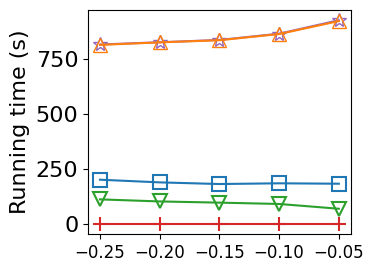

{'IncMiner': {'max_speedup': np.float64(5.007163744279332), 'avg_speedup': np.float64(4.516225009409854)}, 'IncMiner0.7': {'max_speedup': np.float64(13.060394692072132), 'avg_speedup': np.float64(9.213562017632572)}}
{'IncMiner0.7': {'max_speedup': np.float64(2.6083418396279914), 'avg_speedup': np.float64(2.021210676549599)}}


In [45]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    plt.plot(group['confDiff'], group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            )

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis


if VERBOSE:
    plt.xlabel("$\Delta \delta$")  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
plt.tick_params(axis='x', labelsize=12)  

outfile = "plots/exp1_inspection_decrease_conf.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')
# Display the plot
plt.show()

# Compute speedup
print(compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7']))

print(compute_speedup(df, 'IncMiner', ['IncMiner0.7']))

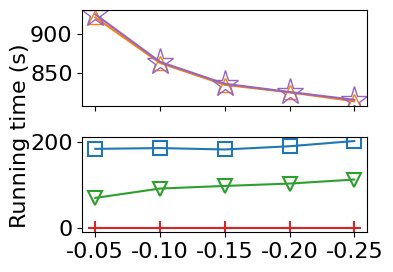

{'IncMiner': {'max_speedup': np.float64(5.007163744279332),
  'avg_speedup': np.float64(4.516225009409854)},
 'IncMiner0.7': {'max_speedup': np.float64(13.060394692072132),
  'avg_speedup': np.float64(9.213562017632572)}}

In [46]:
# Group by the "label" column
groups = df.groupby('label')

# Create a figure with two subplots (vertically stacked)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)


top_labels = ['batch', 'IncMinerNS']
bottom_labels = ['IncMiner', 'IncMiner0.7', 'IApriori']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


X = group['confDiff']
xtick_labels = [f"{v:.2f}" for v in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_decrease_conf.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## s+c+

In [27]:
tab = 'supp inc | conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,auxiliary size,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMiner,3,0.7,20.0,5.752000e+03,...,38.442465,0.302095,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner0.7,5.752000
1,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMiner,3,0.7,20.0,4.580000e+03,...,39.017492,0.172996,0.0,0.000023,NaN,NaN,100.0,0.10,IncMiner0.7,4.580000
2,inc_rds.inspection,0.000001,0.7,0.00100,0.85,IncMiner,3,0.7,20.0,1.214000e+03,...,39.060474,0.000023,0.0,0.000023,NaN,NaN,1000.0,0.15,IncMiner0.7,1.214000
3,inc_rds.inspection,0.000001,0.7,0.01000,0.90,IncMiner,3,0.7,20.0,7.740000e+02,...,39.041031,0.000023,0.0,0.000023,NaN,NaN,10000.0,0.20,IncMiner0.7,1.000000
4,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMiner,3,NaN,20.0,5.336000e+03,...,38.442465,0.302095,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner,5.336000
5,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMiner,3,NaN,20.0,4.592000e+03,...,39.017492,0.172996,0.0,0.000023,NaN,NaN,100.0,0.10,IncMiner,4.592000
6,inc_rds.inspection,0.000001,0.7,0.00100,0.85,IncMiner,3,NaN,20.0,1.292000e+03,...,39.060474,0.000023,0.0,0.000023,NaN,NaN,1000.0,0.15,IncMiner,1.292000
7,inc_rds.inspection,0.000001,0.7,0.01000,0.90,IncMiner,3,NaN,20.0,9.140000e+02,...,39.041031,0.000023,0.0,0.000023,NaN,NaN,10000.0,0.20,IncMiner,1.000000
8,inc_rds.inspection,0.000001,0.7,0.00001,0.75,IncMinerNS,3,NaN,20.0,5.383000e+03,...,30.556942,0.302095,0.0,0.000023,NaN,NaN,10.0,0.05,IncMinerNS,5.383000
9,inc_rds.inspection,0.000001,0.7,0.00010,0.80,IncMinerNS,3,NaN,20.0,4.126000e+03,...,31.192894,0.172996,0.0,0.000023,NaN,NaN,100.0,0.10,IncMinerNS,4.126000


TypeError: 'value' must be an instance of str or bytes, not a float

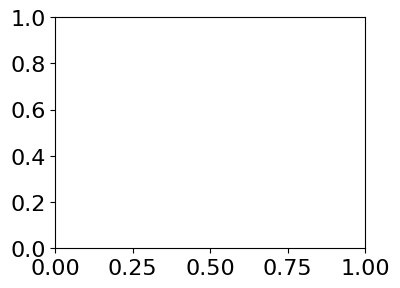

In [128]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
             markersize=markerStyleMap[label].get('markersize', 10)
            )
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s+c+_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_38509/3653923926.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


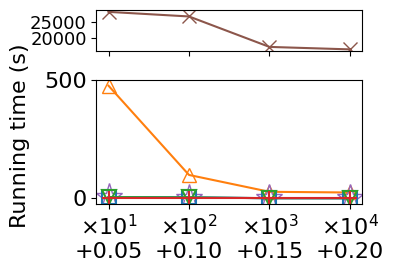

{'IncMiner': {'max_speedup': np.float64(89.44415292353823),
  'avg_speedup': np.float64(39.5998430051049)},
 'IncMiner0.7': {'max_speedup': np.float64(82.97531293463143),
  'avg_speedup': np.float64(38.34870530285781)}}

In [29]:
# Group by the "label" column
groups = df.groupby('label')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['DCFinder']
bottom_labels = ['batch', 'IncMinerNS','IncMiner', 'IncMiner0.7', 'IApriori']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # # Add 'TO' tick to the top subplot only if there is timeout in the values
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Adjust the y-axis tick font size
ax_top.tick_params(axis='y', labelsize=13)  # Adjust font size for y-axis ticks on the top plot


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_s+c+_lambda_rate.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S+C-

In [112]:
tab = 'supp inc | conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),index,supportScale,confDiff,label,time
0,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMiner,3,0.7,20.0,4.112900e+04,...,0.944035,0.0,0.000023,NaN,NaN,NaN,10.0,-0.05,IncMiner0.7,41.129000
1,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMiner,3,0.7,20.0,6.265800e+04,...,0.795058,0.0,0.000023,NaN,NaN,NaN,100.0,-0.10,IncMiner0.7,62.658000
2,inc_rds.adult,0.000001,0.95,0.00100,0.80,IncMiner,3,0.7,20.0,8.308900e+04,...,0.800678,0.0,0.000023,NaN,NaN,NaN,1000.0,-0.15,IncMiner0.7,83.089000
3,inc_rds.adult,0.000001,0.95,0.01000,0.75,IncMiner,3,0.7,20.0,9.521300e+04,...,0.998651,0.0,0.000023,NaN,NaN,NaN,10000.0,-0.20,IncMiner0.7,95.213000
4,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMiner,3,NaN,20.0,9.339800e+04,...,0.638452,0.0,0.000023,NaN,NaN,NaN,10.0,-0.05,IncMiner,93.398000
5,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMiner,3,NaN,20.0,1.135760e+05,...,0.470932,0.0,0.000023,NaN,NaN,NaN,100.0,-0.10,IncMiner,113.576000
6,inc_rds.adult,0.000001,0.95,0.00100,0.80,IncMiner,3,NaN,20.0,1.357300e+05,...,0.419765,0.0,0.000023,NaN,NaN,NaN,1000.0,-0.15,IncMiner,135.730000
7,inc_rds.adult,0.000001,0.95,0.01000,0.75,IncMiner,3,NaN,20.0,1.542480e+05,...,0.463850,0.0,0.000023,NaN,NaN,NaN,10000.0,-0.20,IncMiner,154.248000
8,inc_rds.adult,0.000001,0.95,0.00001,0.90,IncMinerNS,3,NaN,20.0,9.593340e+05,...,1.280627,19370.0,75.095021,NaN,NaN,NaN,10.0,-0.05,IncMinerNS,959.334000
9,inc_rds.adult,0.000001,0.95,0.00010,0.85,IncMinerNS,3,NaN,20.0,6.763010e+05,...,0.220093,18463.0,71.328004,NaN,NaN,NaN,100.0,-0.10,IncMinerNS,676.301000


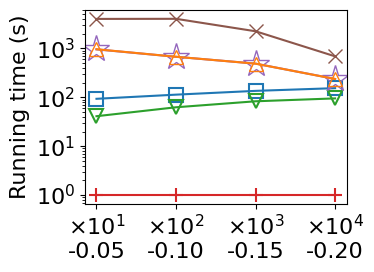

{'IncMiner': {'max_speedup': np.float64(10.331548855435877),
  'avg_speedup': np.float64(5.360047951908347)},
 'IncMiner0.7': {'max_speedup': np.float64(23.46145055800044),
  'avg_speedup': np.float64(10.663758167021285)}}

In [113]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10))
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

plt.yscale('log')
# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s+c-_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

# compute_speedup(df, 'IncMiner', ['IncMiner0.7'])

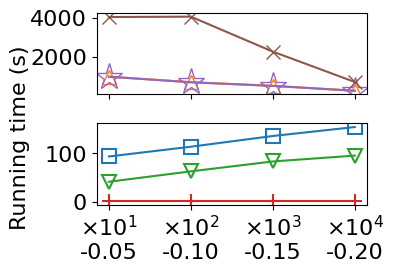

{'IncMiner': {'max_speedup': np.float64(10.331548855435877),
  'avg_speedup': np.float64(5.360047951908347)},
 'IncMiner0.7': {'max_speedup': np.float64(23.46145055800044),
  'avg_speedup': np.float64(10.663758167021285)}}

In [114]:
# Group by the "label" column
groups = df.groupby('label')

# Create a figure with two subplots (vertically stacked)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)


top_labels = ['batch', 'IncMinerNS', 'DCFinder']
bottom_labels = ['IncMiner', 'IncMiner0.7', 'IApriori']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_adult_s+c-_lambda_rate.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C+

In [42]:
tab = 'supp dec | conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,auxiliary size,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMiner,3,0.7,20.0,2131.0,...,29.846386,0.000023,0.0,0.000023,NaN,NaN,0.1000,0.05,IncMiner0.7,2.131
1,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMiner,3,0.7,20.0,18994.0,...,30.576385,0.148433,0.0,0.000023,NaN,NaN,0.0100,0.10,IncMiner0.7,18.994
2,inc_rds.inspection,0.01,0.7,0.000010,0.85,IncMiner,3,0.7,20.0,176400.0,...,34.809259,0.318789,0.0,0.000023,NaN,NaN,0.0010,0.15,IncMiner0.7,176.4
3,inc_rds.inspection,0.01,0.7,0.000001,0.90,IncMiner,3,0.7,20.0,407654.0,...,38.857201,1.297008,0.0,0.000023,NaN,NaN,0.0001,0.20,IncMiner0.7,407.654
4,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMiner,3,NaN,20.0,2104.0,...,29.846386,0.000023,0.0,0.000023,NaN,NaN,0.1000,0.05,IncMiner,2.104
5,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMiner,3,NaN,20.0,19184.0,...,30.576385,0.148433,0.0,0.000023,NaN,NaN,0.0100,0.10,IncMiner,19.184
6,inc_rds.inspection,0.01,0.7,0.000010,0.85,IncMiner,3,NaN,20.0,176822.0,...,34.809259,0.318789,0.0,0.000023,NaN,NaN,0.0010,0.15,IncMiner,176.822
7,inc_rds.inspection,0.01,0.7,0.000001,0.90,IncMiner,3,NaN,20.0,412069.0,...,38.857201,1.297008,0.0,0.000023,NaN,NaN,0.0001,0.20,IncMiner,412.069
8,inc_rds.inspection,0.01,0.7,0.001000,0.75,IncMinerNS,3,NaN,20.0,1941.0,...,29.738293,0.000023,0.0,0.000023,NaN,NaN,0.1000,0.05,IncMinerNS,1.941
9,inc_rds.inspection,0.01,0.7,0.000100,0.80,IncMinerNS,3,NaN,20.0,18989.0,...,29.946482,0.148433,0.0,0.000023,NaN,NaN,0.0100,0.10,IncMinerNS,18.989


ValueError: could not convert string to float: 'timeout'

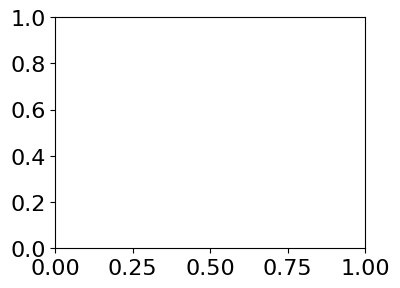

In [43]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
             markersize=markerStyleMap[label].get('markersize', 10)
            )
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s-c+_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_38509/2567947073.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


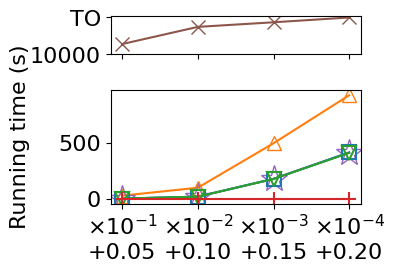

{'IncMiner': {'max_speedup': np.float64(13.224334600760457),
  'avg_speedup': np.float64(5.846392129566542)},
 'IncMiner0.7': {'max_speedup': np.float64(13.056780854059129),
  'avg_speedup': np.float64(5.825069877538627)}}

In [44]:
# Group by the "label" column
groups = df.groupby('label')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['DCFinder']
bottom_labels = ['batch', 'IncMinerNS','IncMiner', 'IncMiner0.7', 'IApriori']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_s-c+_lambda_rate.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C-

In [109]:
tab = 'supp dec | conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),index,supportScale,confDiff,label,time
0,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMiner,3,0.7,20.0,8.518800e+04,...,0.557168,0.0,0.000023,NaN,NaN,NaN,0.1000,-0.05,IncMiner0.7,85.188000
1,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMiner,3,0.7,20.0,1.132020e+05,...,0.229047,0.0,0.000023,NaN,NaN,NaN,0.0100,-0.10,IncMiner0.7,113.202000
2,inc_rds.adult,0.01,0.95,0.000010,0.80,IncMiner,3,0.7,20.0,1.515240e+05,...,1.455980,0.0,0.000023,NaN,NaN,NaN,0.0010,-0.15,IncMiner0.7,151.524000
3,inc_rds.adult,0.01,0.95,0.000001,0.75,IncMiner,3,0.7,20.0,1.409030e+05,...,0.883308,0.0,0.000023,NaN,NaN,NaN,0.0001,-0.20,IncMiner0.7,140.903000
4,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMiner,3,NaN,20.0,9.199200e+04,...,0.096059,0.0,0.000023,NaN,NaN,NaN,0.1000,-0.05,IncMiner,91.992000
5,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMiner,3,NaN,20.0,1.364690e+05,...,0.156374,0.0,0.000023,NaN,NaN,NaN,0.0100,-0.10,IncMiner,136.469000
6,inc_rds.adult,0.01,0.95,0.000010,0.80,IncMiner,3,NaN,20.0,1.802560e+05,...,0.711972,0.0,0.000023,NaN,NaN,NaN,0.0010,-0.15,IncMiner,180.256000
7,inc_rds.adult,0.01,0.95,0.000001,0.75,IncMiner,3,NaN,20.0,1.702470e+05,...,0.752964,0.0,0.000023,NaN,NaN,NaN,0.0001,-0.20,IncMiner,170.247000
8,inc_rds.adult,0.01,0.95,0.001000,0.90,IncMinerNS,3,NaN,20.0,6.507050e+05,...,0.118011,14805.0,57.031095,NaN,NaN,NaN,0.1000,-0.05,IncMinerNS,650.705000
9,inc_rds.adult,0.01,0.95,0.000100,0.85,IncMinerNS,3,NaN,20.0,6.842200e+05,...,0.220093,18607.0,71.843302,NaN,NaN,NaN,0.0100,-0.10,IncMinerNS,684.220000


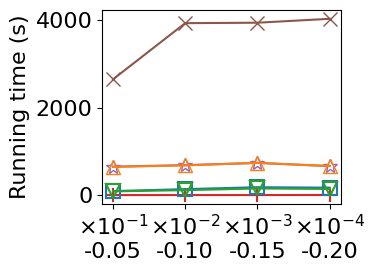

{'IncMiner': {'max_speedup': np.float64(6.995706148360727),
  'avg_speedup': np.float64(4.987962296023073)},
 'IncMiner0.7': {'max_speedup': np.float64(7.554456026670422),
  'avg_speedup': np.float64(5.779800397237365)}}

In [110]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            )
    
xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s-c-_lambda_rate.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

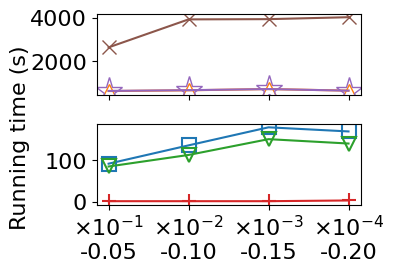

{'IncMiner': {'max_speedup': np.float64(6.995706148360727),
  'avg_speedup': np.float64(4.987962296023073)},
 'IncMiner0.7': {'max_speedup': np.float64(7.554456026670422),
  'avg_speedup': np.float64(5.779800397237365)}}

In [111]:
# Group by the "label" column
groups = df.groupby('label')

# Create a figure with two subplots (vertically stacked)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)


top_labels = ['batch', 'IncMinerNS', 'DCFinder']
bottom_labels = ['IncMiner', 'IncMiner0.7', 'IApriori']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_adult_s-c-_lambda_rate.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Should exhibit some monotoniciy: the 3rd or 4th data point rerun?

# Change initial parameters

## S+C+

In [31]:
tab = '(old change) supp inc|conf inc'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,auxiliary size,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),supportScale,confDiff,label,time
0,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMiner,3,0.7,20.0,4.830000e+03,...,36.768492,0.362151,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner0.7,4.830000
1,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMiner,3,0.7,20.0,8.270000e+03,...,34.376399,0.151433,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner0.7,8.270000
2,inc_rds.inspection,0.000100,0.85,0.00100,0.90,IncMiner,3,0.7,20.0,2.000000e+00,...,33.445396,0.000023,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner0.7,1.000000
3,inc_rds.inspection,0.001000,0.90,0.01000,0.95,IncMiner,3,0.7,20.0,0.000000e+00,...,31.665928,0.000023,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner0.7,1.000000
4,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMiner,3,NaN,20.0,5.102000e+03,...,36.768492,0.362151,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner,5.102000
5,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMiner,3,NaN,20.0,8.402000e+03,...,34.376399,0.151433,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner,8.402000
6,inc_rds.inspection,0.000100,0.85,0.00100,0.90,IncMiner,3,NaN,20.0,2.000000e+00,...,33.445396,0.000023,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner,1.000000
7,inc_rds.inspection,0.001000,0.90,0.01000,0.95,IncMiner,3,NaN,20.0,0.000000e+00,...,31.665928,0.000023,0.0,0.000023,NaN,NaN,10.0,0.05,IncMiner,1.000000
8,inc_rds.inspection,0.000001,0.75,0.00001,0.80,IncMinerNS,3,NaN,20.0,5.024000e+03,...,30.647130,0.362151,0.0,0.000023,NaN,NaN,10.0,0.05,IncMinerNS,5.024000
9,inc_rds.inspection,0.000010,0.80,0.00010,0.85,IncMinerNS,3,NaN,20.0,8.389000e+03,...,31.506957,0.151433,0.0,0.000023,NaN,NaN,10.0,0.05,IncMinerNS,8.389000


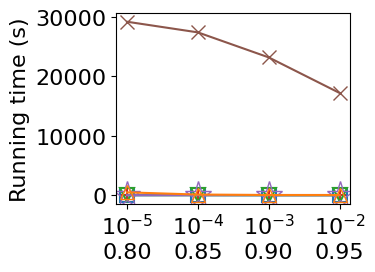

{'IncMiner': {'max_speedup': np.float64(94.35985887887102),
  'avg_speedup': np.float64(40.4952897613745)},
 'IncMiner0.7': {'max_speedup': np.float64(99.67370600414078),
  'avg_speedup': np.float64(41.87538357479578)}}

In [24]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
             markersize=markerStyleMap[label].get('markersize', 10)
            )
    
xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_s+c+_lambda_init.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_38509/2539564123.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


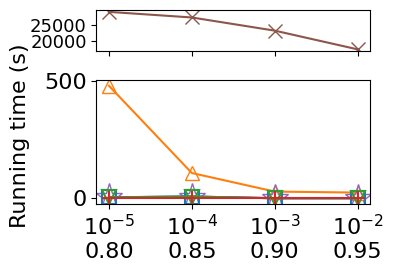

{'IncMiner': {'max_speedup': np.float64(94.35985887887102),
  'avg_speedup': np.float64(40.4952897613745)},
 'IncMiner0.7': {'max_speedup': np.float64(99.67370600414078),
  'avg_speedup': np.float64(41.87538357479578)}}

In [33]:
# Group by the "label" column
groups = df.groupby('label')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['DCFinder']
bottom_labels = ['batch', 'IncMinerNS','IncMiner', 'IncMiner0.7', 'IApriori']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

    
ax_top.tick_params(axis='y', labelsize=13)  # Adjust font size for y-axis ticks on the top plot

xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_s+c+_lambda_init.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

## S-C-

In [115]:
tab = '(old change) supp dec|conf dec'
df =dfs[tab]
df = post_process(df)
# df = df.dropna(subset=['supportScale'])
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,...,minimal size,decision tree REE number,decision tree size,worker instances数量,frequest itemSets time(s),index,supportScale,confDiff,label,time
0,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMiner,3,0.7,20.0,8.678300e+04,...,0.557168,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner0.7,86.783000
1,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMiner,3,0.7,20.0,5.226700e+04,...,0.166697,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner0.7,52.267000
2,inc_rds.adult,0.00010,0.85,0.000010,0.80,IncMiner,3,0.7,20.0,3.871500e+04,...,0.173347,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner0.7,38.715000
3,inc_rds.adult,0.00001,0.80,0.000001,0.75,IncMiner,3,0.7,20.0,1.936000e+03,...,0.173347,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner0.7,1.936000
4,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMiner,3,NaN,20.0,9.506600e+04,...,0.096059,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner,95.066000
5,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMiner,3,NaN,20.0,7.721700e+04,...,0.141020,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner,77.217000
6,inc_rds.adult,0.00010,0.85,0.000010,0.80,IncMiner,3,NaN,20.0,6.826700e+04,...,0.201516,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner,68.267000
7,inc_rds.adult,0.00001,0.80,0.000001,0.75,IncMiner,3,NaN,20.0,6.844000e+03,...,0.173347,0.0,0.000023,NaN,NaN,NaN,0.1,-0.05,IncMiner,6.844000
8,inc_rds.adult,0.01000,0.95,0.001000,0.90,IncMinerNS,3,NaN,20.0,6.546310e+05,...,0.118011,14818.0,57.074482,NaN,NaN,NaN,0.1,-0.05,IncMinerNS,654.631000
9,inc_rds.adult,0.00100,0.90,0.000100,0.85,IncMinerNS,3,NaN,20.0,6.859760e+05,...,0.220093,18611.0,71.859669,NaN,NaN,NaN,0.1,-0.05,IncMinerNS,685.976000


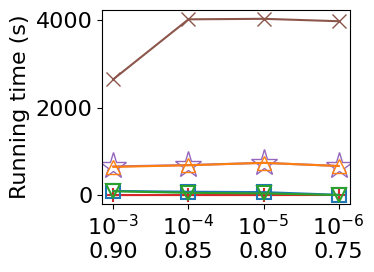

{'IncMiner': {'max_speedup': np.float64(97.18249561659847),
  'avg_speedup': np.float64(30.898762206958267)},
 'IncMiner0.7': {'max_speedup': np.float64(343.5521694214876),
  'avg_speedup': np.float64(95.76680301580429)}}

In [116]:
# Group by the "label" column
groups = df.groupby('label')

# Create a plot for each group
plt.figure()

for label, group in groups:
    
    plt.plot(range(len(group)), group['time'], label=label, marker=markerMap[label], color=colorMap[label],
                             markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
             markersize=markerStyleMap[label].get('markersize', 10)
            )
    
xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

# plt.tick_params(axis='x', labelsize=16)  
# plt.tick_params(axis='y', labelsize=14)  

# Add plot labels and legend
plt.ylabel(ylabel_time)  # Label for y-axis

if VERBOSE:
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_adult_s-c-_lambda_init.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')    
    
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

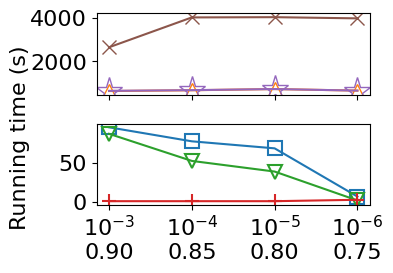

{'IncMiner': {'max_speedup': np.float64(97.18249561659847),
  'avg_speedup': np.float64(30.898762206958267)},
 'IncMiner0.7': {'max_speedup': np.float64(343.5521694214876),
  'avg_speedup': np.float64(95.76680301580429)}}

In [117]:
# Group by the "label" column
groups = df.groupby('label')

# Create a figure with two subplots (vertically stacked)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)


top_labels = ['batch', 'IncMinerNS', 'DCFinder']
bottom_labels = ['IncMiner', 'IncMiner0.7', 'IApriori']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )


xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(group['new support'], group['new confidence'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_adult_s-c-_lambda_init.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner', 'IncMiner0.7'])

**Comments**:

Should exhibit some monotoniciy: the 3rd or 4th data point rerun?

# Exp-5

In [75]:
dfs_guidlines = pd.read_excel('results-guidelines-12-31.xlsx', sheet_name=None)

# Print the names of the sheets
print(dfs_guidlines.keys())

dict_keys(['Guidelines(S-C-)', 'Guidelines(S-C+)', 'Guidelines(S-C+)-adjusted'])


In [76]:
df = dfs_guidlines['Guidelines(S-C-)']
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,recall rate,cover count,taskId,supportScale,confDiff,label,time
0,inc_rds.adult,0.10000,1.00,0.01000,1.00,IncMiner,3,NaN,20,343361,0.066667,1,1003076,0.1,0.00,IncMiner,343.361
1,inc_rds.adult,0.01000,1.00,0.01000,0.95,IncMiner,3,NaN,20,8,0.200000,3,1003077,1.0,-0.05,IncMiner,1.000
2,inc_rds.adult,0.01000,0.95,0.00100,0.95,IncMiner,3,NaN,20,296787,0.266667,4,1003078,0.1,0.00,IncMiner,296.787
3,inc_rds.adult,0.00100,0.95,0.00100,0.90,IncMiner,3,NaN,20,9234,0.400000,6,1003079,1.0,-0.05,IncMiner,9.234
4,inc_rds.adult,0.00100,0.90,0.00010,0.90,IncMiner,3,NaN,20,114803,0.400000,6,1003080,0.1,0.00,IncMiner,114.803
5,inc_rds.adult,0.00010,0.90,0.00010,0.85,IncMiner,3,NaN,20,28220,0.733333,11,1003081,1.0,-0.05,IncMiner,28.220
6,inc_rds.adult,0.00010,0.85,0.00001,0.85,IncMiner,3,NaN,20,160834,0.866667,13,1003082,0.1,0.00,IncMiner,160.834
7,inc_rds.adult,0.00001,0.85,0.00001,0.80,IncMiner,3,NaN,20,42389,1.000000,15,1003083,1.0,-0.05,IncMiner,42.389


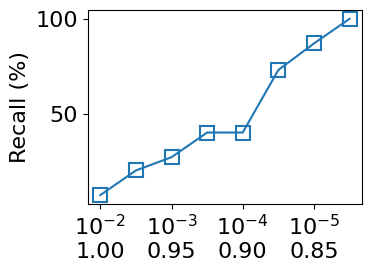

In [77]:
Y = (df["recall rate"] * 100).round().astype(int)

# Plot the data
label = "IncMiner"
plt.plot(range(1,len(Y)+1), Y, marker=markerMap[label], color=colorMap[label],                
         markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
         markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 
plt.ylabel('Recall (%)')  # Label for the y-axis

xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(df['new support'], df['new confidence'])]
plt.xticks(range(1,len(df)+1)[::2], xtick_labels[::2])

# plt.tick_params(axis='x', labelsize=10)  


outfile = "plots/exp5_guideline_2.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')     

# Show the plot
plt.show()

In [78]:
df["time"].cumsum()

0    343.361
1    344.361
2    641.148
3    650.382
4    765.185
5    793.405
6    954.239
7    996.628
Name: time, dtype: float64

In [79]:
df = dfs_guidlines['Guidelines(S-C+)']
df = post_process(df)
df

,dataset name,old support,old confidence,new support,new confidence,Baseline,K,beta,worker instances,Mining time,recall rate,cover count,taskId,supportScale,confDiff,label,time
0,inc_rds.adult,0.010000,0.75,0.001000,0.75,IncMiner,3,NaN,20,233311,0.866667,13,1003085,0.1,0.00,IncMiner,233.311
1,inc_rds.adult,0.001000,0.75,0.001000,0.80,IncMiner,3,NaN,20,47384,0.866667,13,1003086,1.0,0.05,IncMiner,47.384
2,inc_rds.adult,0.001000,0.80,0.000100,0.80,IncMiner,3,NaN,20,96090,0.866667,13,1003087,0.1,0.00,IncMiner,96.090
3,inc_rds.adult,0.000100,0.80,0.000100,0.85,IncMiner,3,NaN,20,94518,0.866667,13,1003088,1.0,0.05,IncMiner,94.518
4,inc_rds.adult,0.000100,0.85,0.000010,0.85,IncMiner,3,NaN,20,162949,1.000000,15,1003089,0.1,0.00,IncMiner,162.949
5,inc_rds.adult,0.000010,0.85,0.000010,0.90,IncMiner,3,NaN,20,136267,1.000000,15,1003090,1.0,0.05,IncMiner,136.267
6,inc_rds.adult,0.000010,0.90,0.000001,0.90,IncMiner,3,NaN,20,0,1.000000,15,1003091,0.1,0.00,IncMiner,1.000
7,inc_rds.adult,0.000001,0.90,0.000001,0.95,IncMiner,3,NaN,20,191107,1.000000,15,1003092,1.0,0.05,IncMiner,191.107


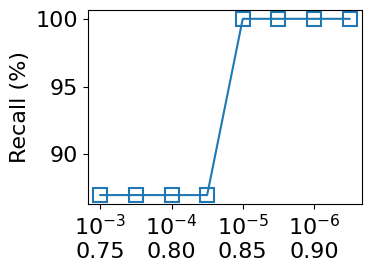

In [80]:
Y = (df["recall rate"] * 100).round().astype(int)

# Plot the data
label = "IncMiner"
plt.plot(range(1,len(Y)+1), Y, marker=markerMap[label], color=colorMap[label],                
         markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
         markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),) 
plt.ylabel('Recall (%)')  # Label for the y-axis

xtick_labels = [fr"$10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:.2f}" for ss, cd in zip(df['new support'], df['new confidence'])]
# plt.xticks(range(1,len(df)+1), xtick_labels)
plt.xticks(range(1,len(df)+1)[::2], xtick_labels[::2])

# plt.tick_params(axis='x', labelsize=10)  


outfile = "plots/exp5_guideline_1.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')     

# Show the plot
plt.show()

In [81]:
df["time"].cumsum()

0    233.311
1    280.695
2    376.785
3    471.303
4    634.252
5    770.519
6    771.519
7    962.626
Name: time, dtype: float64

In [82]:
df = pd.read_csv("guidelines-rules-12-31-with-support-confidence.txt")

In [83]:
df

,ree,support,confidence
0,t0.education-num=t1.education-num -> t0.educat...,0.190420,1.000000
1,t0.capital-loss=t1.capital-loss ^ t0.income=t1...,0.109116,0.894682
2,t0.education=t1.education ^ t0.age=t1.age ^ t0...,0.163292,0.857537
3,t0.capital-gain=t1.capital-gain -> t0.capital-...,0.757445,0.900984
4,t0.income=t1.income -> t0.capital-gain=t1.capi...,0.565280,0.891104
5,t0.marital-status=t1.marital-status ^ t0.relat...,0.192112,0.889270
6,t0.income=t1.income ^ t0.marital-status=t1.mar...,0.160476,0.842747
7,t0.race=t1.race ^ t0.income=t1.income ^ t0.hou...,0.100288,0.929060
8,t0.fnlwgt=t1.fnlwgt ^ t0.education-num=t1.educ...,0.000037,0.937185
9,t0.capital-gain=t1.capital-gain ^ t0.native-co...,0.126558,0.822930


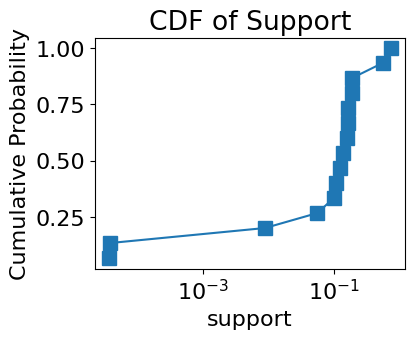

In [84]:
sorted_values = df['support'].sort_values()
cdf = sorted_values.rank(method='first', pct=True)

# Plot the CDF
plt.plot(sorted_values, cdf, marker='s')
plt.xscale("log")
plt.xlabel("support")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Support")
plt.show()

In [85]:
df['support'].min()

np.float64(3.56954647662e-05)

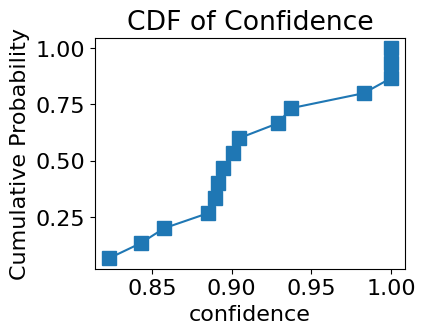

In [86]:
sorted_values = df['confidence'].sort_values()
cdf = sorted_values.rank(method='first', pct=True)

# Plot the CDF
plt.plot(sorted_values, cdf, marker='s')
plt.xlabel("confidence")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Confidence")
plt.show()

In [87]:
df['confidence'].min()

np.float64(0.8229295304681721)